# About Dataset
Descrição do dataset a respeito dos atributos

 1. Id: bla bla
 2. MSSubClass: The building class

# Notebook Objectives

Goal of the notebook is to:
 1. Explore every feature in the dataset;
 2. Bla Bla Bla

# Table of Contents

# Import Necessary Libraries

In [184]:
# Basic Libraries
import os
import git

# Data Manipulation and Calculation
import pandas as pd
import numpy as np
from scipy.stats import mode

# Libraries for data visualization
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker

In [185]:
# Função para encontrar diretório do repositório git
def get_git_root(path) -> str:
    git_repo = git.Repo(path, search_parent_directories=True)
    git_root = git_repo.git.rev_parse("--show-toplevel")
    return git_root


# Diretório do repositório git
git_dir = get_git_root(os.getcwd())

# Diretório dos dados
data_dir = os.path.join(git_dir, "data")

# Leitura dos arquivos de treinamento e teste
df_train = pd.read_csv(os.path.join(data_dir, "train.csv"))
df_test = pd.read_csv(os.path.join(data_dir, "test.csv"))

## Train data

In [186]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [187]:
print("Quantity of Attributes:", df_train.shape[1])
print("Quantity of Objects:", df_train.shape[0])

Quantity of Attributes: 81
Quantity of Objects: 1460


## Test data

In [188]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [189]:
print("Quantity of Attributes:", df_test.shape[1])
print("Quantity of Objects:", df_test.shape[0])

Quantity of Attributes: 80
Quantity of Objects: 1459


# Univariate Analysis

## Categorical Columns

MSSubClass, MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood

### Zoning classification of the sale

In [190]:
df = df_train.copy()

replace_values = {
    "A": "Agriculture",
    "C (all)": "Commercial",
    "FV": "Floating Village Residential",
    "I": "Industrial",
    "RH": "Residential High Density",
    "RL": "Residential Low Density",
    "RP": "Residential Low Density Park ",
    "RM": "Residential Medium Density",
}

inverted_replace_values = {v: k for k, v in replace_values.items()}


df["MSZoning"].replace(replace_values, inplace=True)

zn_classification = df["MSZoning"].value_counts()

inverted_replace_values[zn_classification.index[0]] = zn_classification.index[0]

fig = go.Figure(
    data=[
        go.Pie(
            labels=zn_classification.index,
            values=zn_classification.values,
            marker=dict(colors=px.colors.sequential.Turbo),
        )
    ]
)


fig.update_traces(
    hole=0.33,
    textinfo="none",
    texttemplate="%{label} <br> %{value} (%{percent:.1%})",
)
fig.update_layout(
    title={
        "text": "Zoning classification according number of sales",
        "y": 0.95,
    },
    margin=dict(l=2, r=330, b=0),
    height=450,
    width=1100,
)


fig.show()

## Numeric Columns

In [191]:
# TODO: List numeric columns

### Sales Price

C:\Users\tavar\AppData\Local\Temp\ipykernel_8208\1991694502.py:47: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



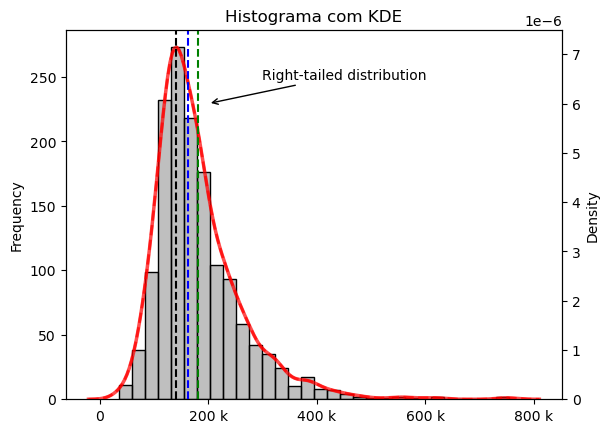

In [192]:
df = df_train.copy()

# Sale Price values
sale_price = df["SalePrice"].values


# plt.hist(sale_price, bins=30, density=True, alpha=0.5, color="gray")
sns.histplot(sale_price, bins=30, alpha=0.5, color="gray")

# Change y label
plt.gca().set_ylabel("Frequency")

# Create a second y-axis for the KDE plot
ax2 = plt.gca().twinx()

sns.kdeplot(sale_price, color="red", label="KDE", lw=2, ls="--", alpha=0.7, ax=ax2)

sns.kdeplot(
    sale_price,
    color="red",
    label="KDE",
    lw=2.5,
    ls="-",
    alpha=0.7,
)

# Format x-axis in engineering notation
plt.gca().xaxis.set_major_formatter(ticker.EngFormatter())


# Add title and labels
plt.title("Histograma com KDE")
plt.xlabel("Sale price value")

ax2.set_ylabel("Density")

plt.annotate(
    "Right-tailed distribution",
    xy=(200e3, 6e-6),
    xytext=(300e3, 6.5e-6),
    arrowprops=dict(facecolor="black", arrowstyle="->"),
)

# Calculate mean, median and mode
mean = np.mean(sale_price)
median = np.median(sale_price)
mode = mode(sale_price)[0]

# Traçar linhas verticais indicando a média, mediana e moda
plt.axvline(mean, color="green", linestyle="--", label="Mean")
plt.axvline(median, color="blue", linestyle="--", label="Median")
plt.axvline(mode, color="black", linestyle="--", label="Mode")

plt.show()

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

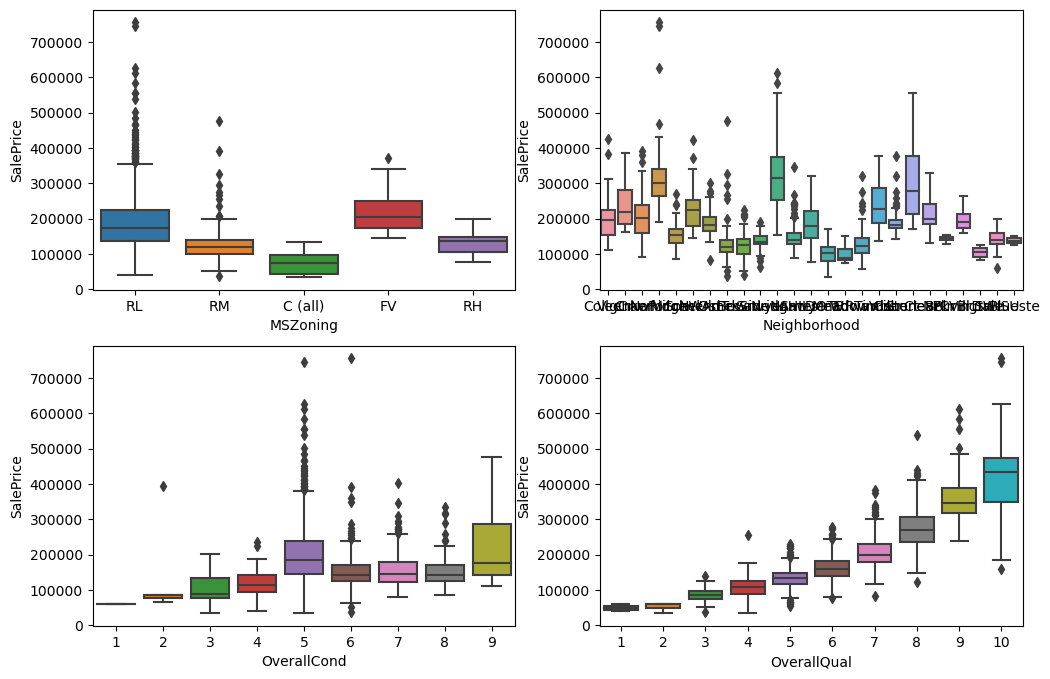

In [193]:
#Análise univariável tendo SalePrice como foco.


#definindo o tamanho das figuras
fig = plt.figure(figsize=(12, 8))

# Gráfico 1 - Barras de Count
fig.add_subplot(221)
#sns.countplot(df_train['MSZoning'])
sns.boxplot(x='MSZoning', y='SalePrice', data=df_train)
                 
# Gráfico 2 - Boxplot de Reason
fig.add_subplot(222)
#sns.boxplot(x='MSZoning', y='SalePrice', data=df_train)
sns.boxplot(x='Neighborhood', y='SalePrice', data=df_train)

# Gráfico 3 - Boxplot de Absences
fig.add_subplot(223)
#sns.boxplot(x='Neighborhood', y='SalePrice', data=df_train)
sns.boxplot(x='OverallCond', y='SalePrice', data=df_train)

# Gráfico 4 - Boxplot violino de Reason
fig.add_subplot(224)
#sns.violinplot(x = 'OverallQual', y = 'SalePrice', data=df_train, palette='Set3', bw=.2, cut=1, split=True, linewidth=1)
sns.boxplot(x='OverallQual', y='SalePrice', data=df_train)

<AxesSubplot:xlabel='Neighborhood', ylabel='OverallCond'>

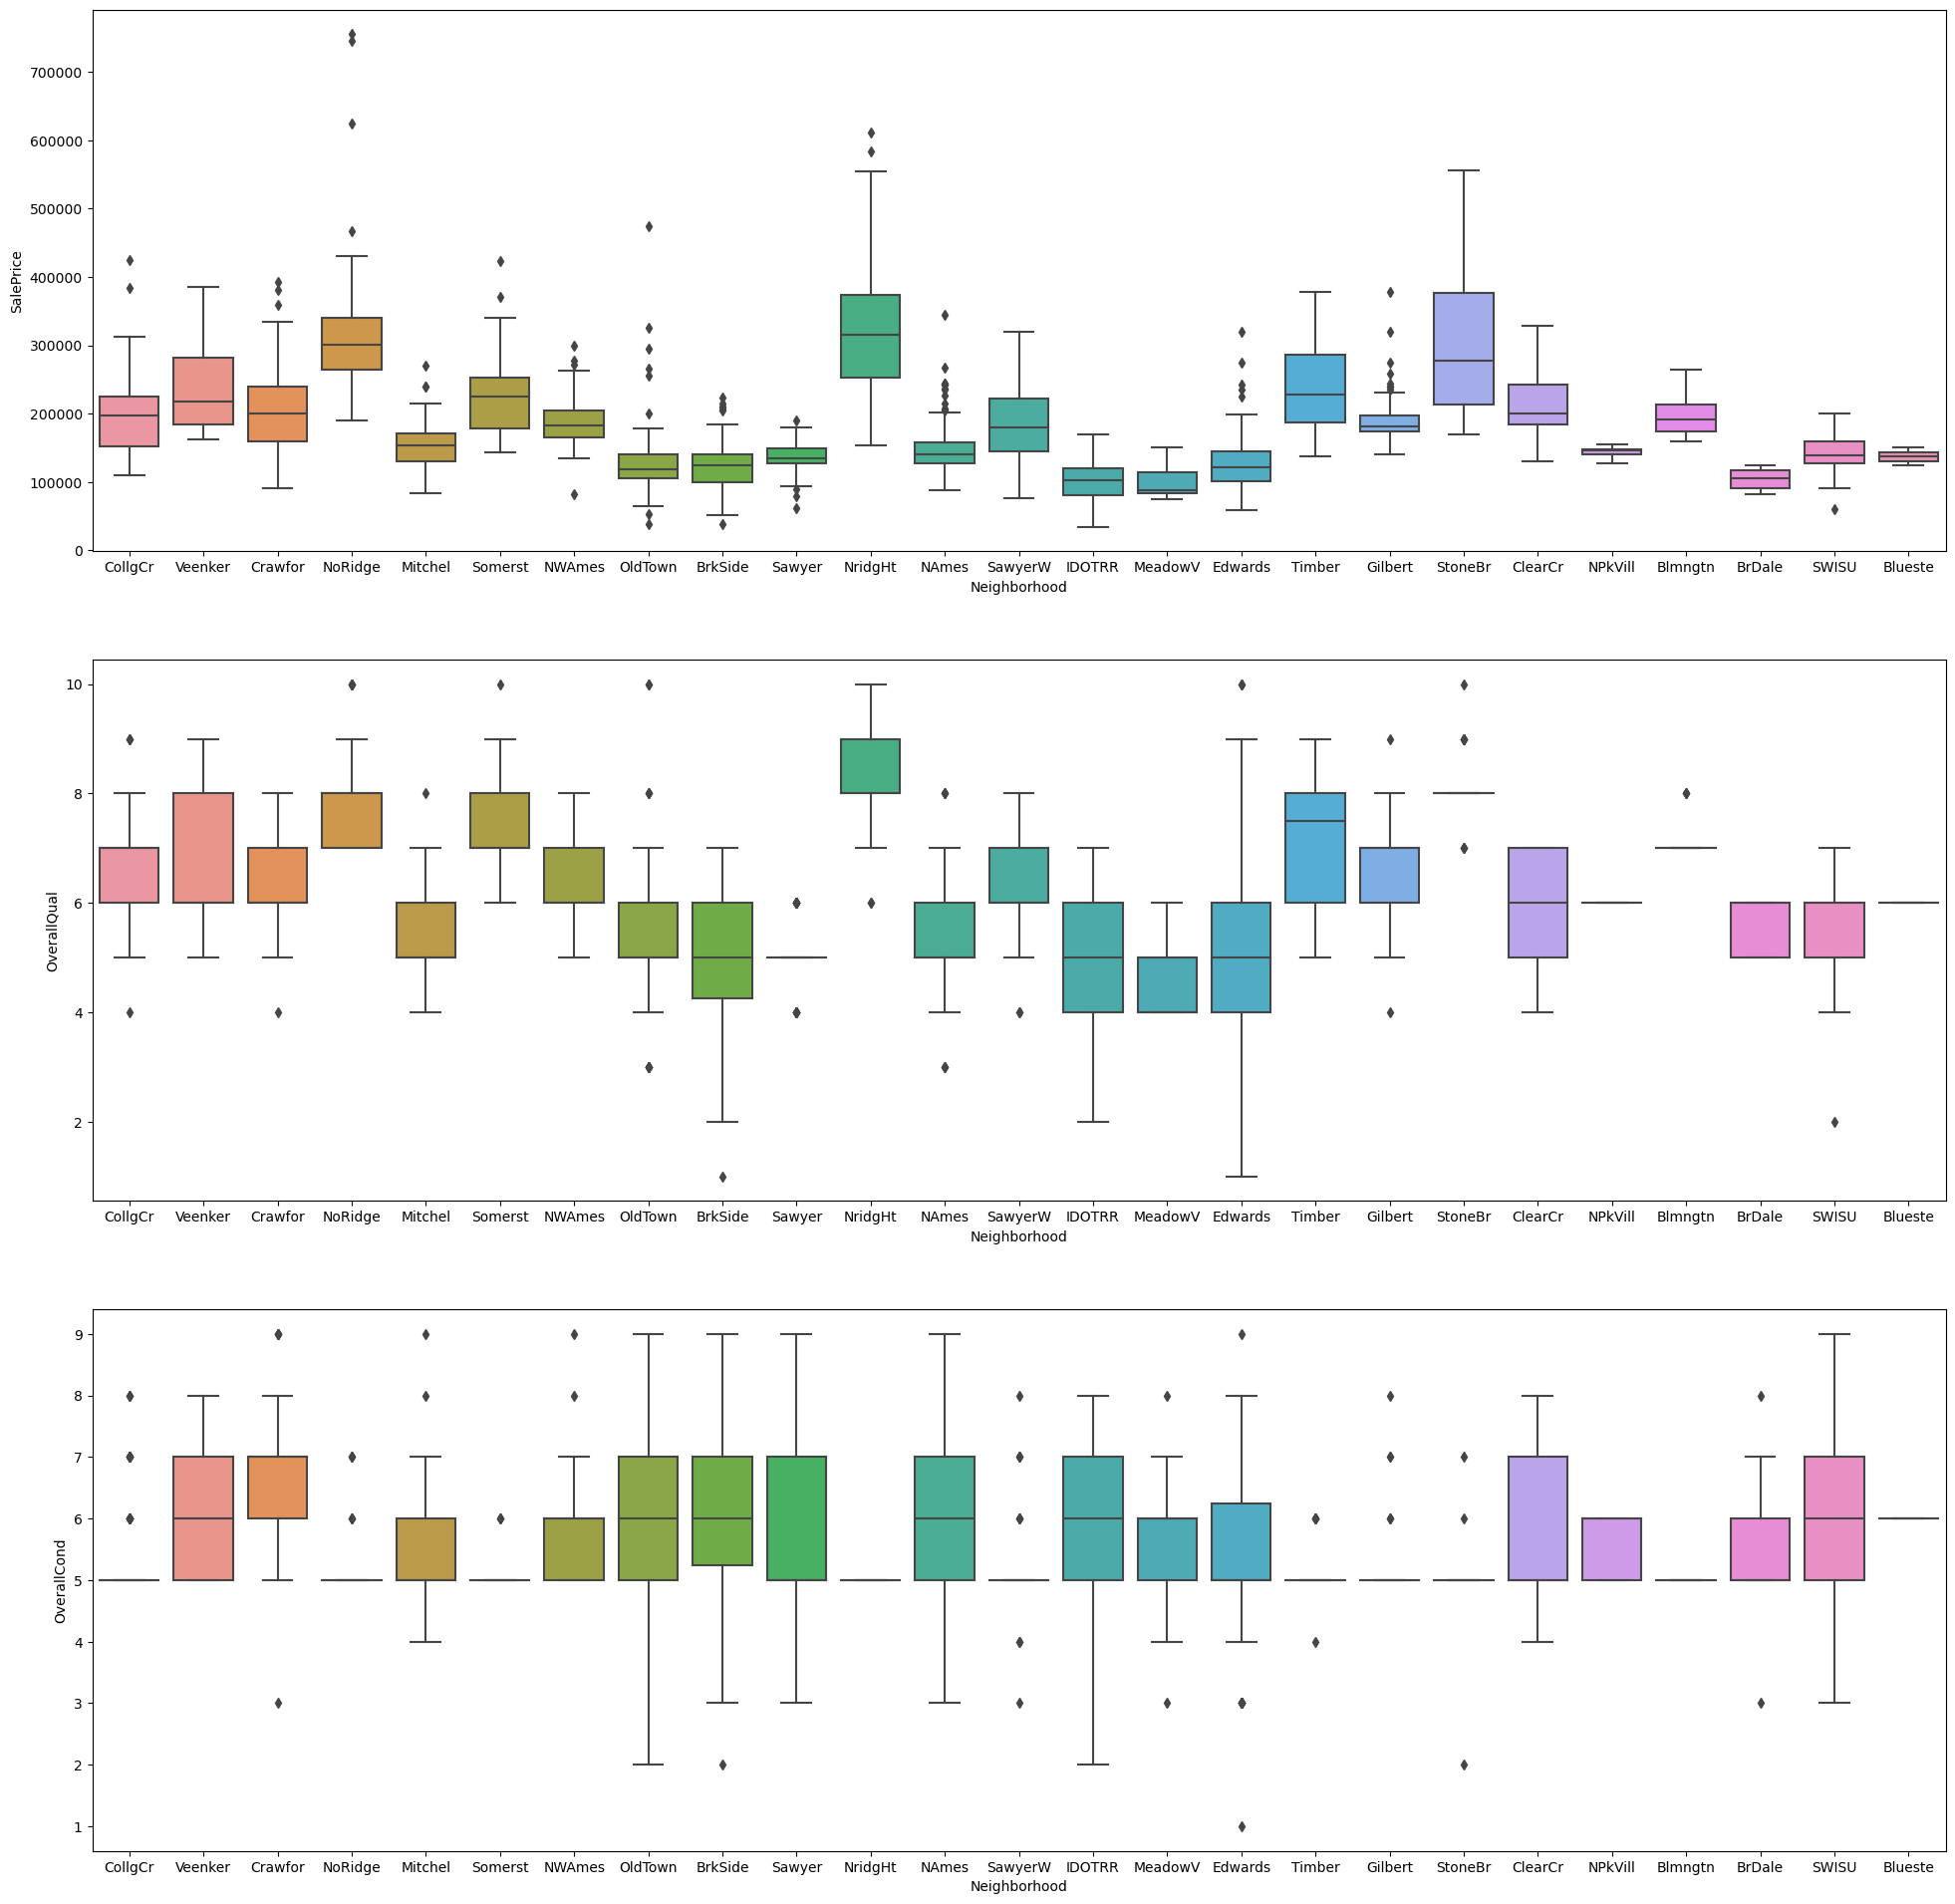

In [194]:
#Análise univariável tendo Neighborhood como foco.
#INSIGHTS:  Se eu quiser especular com preço e imóvel, eu iria no bairro de StoneBr e NridgHt, onde tem a maior variação entre as sombras do boxplot.
            #Provavelmente em NridgHt, devido a variação de OverallQual o mais provável seja comprar um imóvel a aplicar melhorias para aumentar o SalePrice, enquanto em StoneBr, devido a baixa variação de OverallQual as compras se deem por oportunidade e menos por perspectivas de melhorias


#definindo o tamanho das figuras
fig = plt.figure(figsize=(24, 24))

# Gráfico 1 - Barras de Count
fig.add_subplot(311)
#sns.countplot(df_train['MSZoning'])
sns.boxplot(x='Neighborhood', y='SalePrice', data=df_train)
                 
# Gráfico 2 - Boxplot de Reason
fig.add_subplot(312)
#sns.boxplot(x='MSZoning', y='SalePrice', data=df_train)
sns.boxplot(x='Neighborhood', y='OverallQual', data=df_train)

# Gráfico 3 - Boxplot de Absences
fig.add_subplot(313)
#sns.boxplot(x='Neighborhood', y='SalePrice', data=df_train)
sns.boxplot(x='Neighborhood', y='OverallCond', data=df_train)

![image.png](attachment:image.png)

<AxesSubplot:>

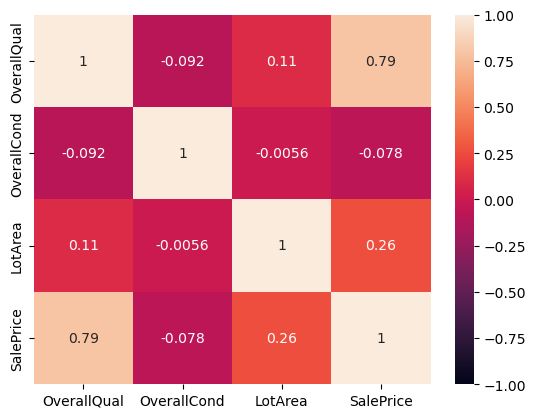

In [195]:
#CORRELAÇÃO ENTRE OVERALLQUAL e OVERALLCOND, LOTAREA, SALEPRICE
df_corr = df_train[['OverallQual', 'OverallCond', 'LotArea', 'SalePrice']]
correlation = df_corr.corr()
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)


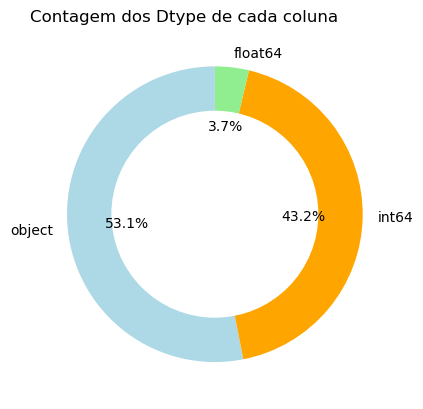

In [196]:
# para saber o tipo de cada atributo (coluna)
#para saber o tipo de cada atributo (coluna)
dtypes_count = df_train.dtypes.value_counts()

# definindo os dados do gráfico
sizes = dtypes_count.values
labels = dtypes_count.index.astype(str)
colors = ['lightblue', 'orange', 'lightgreen']

# criando o gráfico de donut
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

# adicionando o título do gráfico
plt.title('Contagem dos Dtype de cada coluna', loc='left')

# exibindo o gráfico
plt.show()

In [197]:
numericos = list(df_train.select_dtypes(include=['int64', 'float64']).columns)
categoricos = list(df_train.select_dtypes(include=['object']).columns)
print('############################')
print(numericos)
print('############################')
print(categoricos)
print('############################')
print(len(numericos) + len(categoricos))

############################
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
############################
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Funct

In [223]:

# Create a new dataframe to store the label encoded data
df_train_label_encoded = pd.DataFrame()

# Create a dictionary to store the mapping of categorical values to numerical values
mapa_de_legendas = {}

# Encode the categorical variables using LabelEncoder and store the mapping
label_encoder = LabelEncoder()
for col in categoricos:
    encoded_values = label_encoder.fit_transform(df_train[col])
    df_train_label_encoded[col] = encoded_values
    mapa_de_legendas[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Add the numeric columns to the label encoded dataframe
df_train_label_encoded[numericos] = df_train[numericos]

# Print the resulting dataframe
print(df_train_label_encoded)

# Print the label mapping dictionary
for col, mapping in mapa_de_legendas.items():
    print(f"\nLabel Mapping for column '{col}':")
    for category, encoded_value in mapping.items():
        print(f"{category}: {encoded_value}")

      MSZoning  Street  Alley  LotShape  LandContour  Utilities  LotConfig  \
0            3       1      2         3            3          0          4   
1            3       1      2         3            3          0          2   
2            3       1      2         0            3          0          4   
3            3       1      2         0            3          0          0   
4            3       1      2         0            3          0          2   
...        ...     ...    ...       ...          ...        ...        ...   
1455         3       1      2         3            3          0          4   
1456         3       1      2         3            3          0          4   
1457         3       1      2         3            3          0          4   
1458         3       1      2         3            3          0          4   
1459         3       1      2         3            3          0          4   

      LandSlope  Neighborhood  Condition1  ...  WoodDeckSF  Ope

In [224]:
#Mostrar na tela as legandas do mapa de legendas
mapa_de_legendas_especifico = mapa_de_legendas["Neighborhood"]
for category, encoded_value in mapa_de_legendas_especifico.items():
    print(f"{category}: {encoded_value}")

Blmngtn: 0
Blueste: 1
BrDale: 2
BrkSide: 3
ClearCr: 4
CollgCr: 5
Crawfor: 6
Edwards: 7
Gilbert: 8
IDOTRR: 9
MeadowV: 10
Mitchel: 11
NAmes: 12
NPkVill: 13
NWAmes: 14
NoRidge: 15
NridgHt: 16
OldTown: 17
SWISU: 18
Sawyer: 19
SawyerW: 20
Somerst: 21
StoneBr: 22
Timber: 23
Veenker: 24


Numericos Alta Correlação:
       Atributo 1    Atributo 2  Correlação
1052   GarageArea    GarageCars    0.987115
956   GarageYrBlt     YearBuilt    0.974033
506      1stFlrSF   TotalBsmtSF    0.966775
189   OverallQual     SalePrice    0.962500
631     GrLivArea  TotRmsAbvGrd    0.945444
957   GarageYrBlt  YearRemodAdd    0.905028
1025   GarageCars     SalePrice    0.903554
992    GarageCars   OverallQual    0.903027
1063   GarageArea     SalePrice    0.900257

Numericos Baixa Correlação:
Empty DataFrame
Columns: [Atributo 1, Atributo 2, Correlação]
Index: []


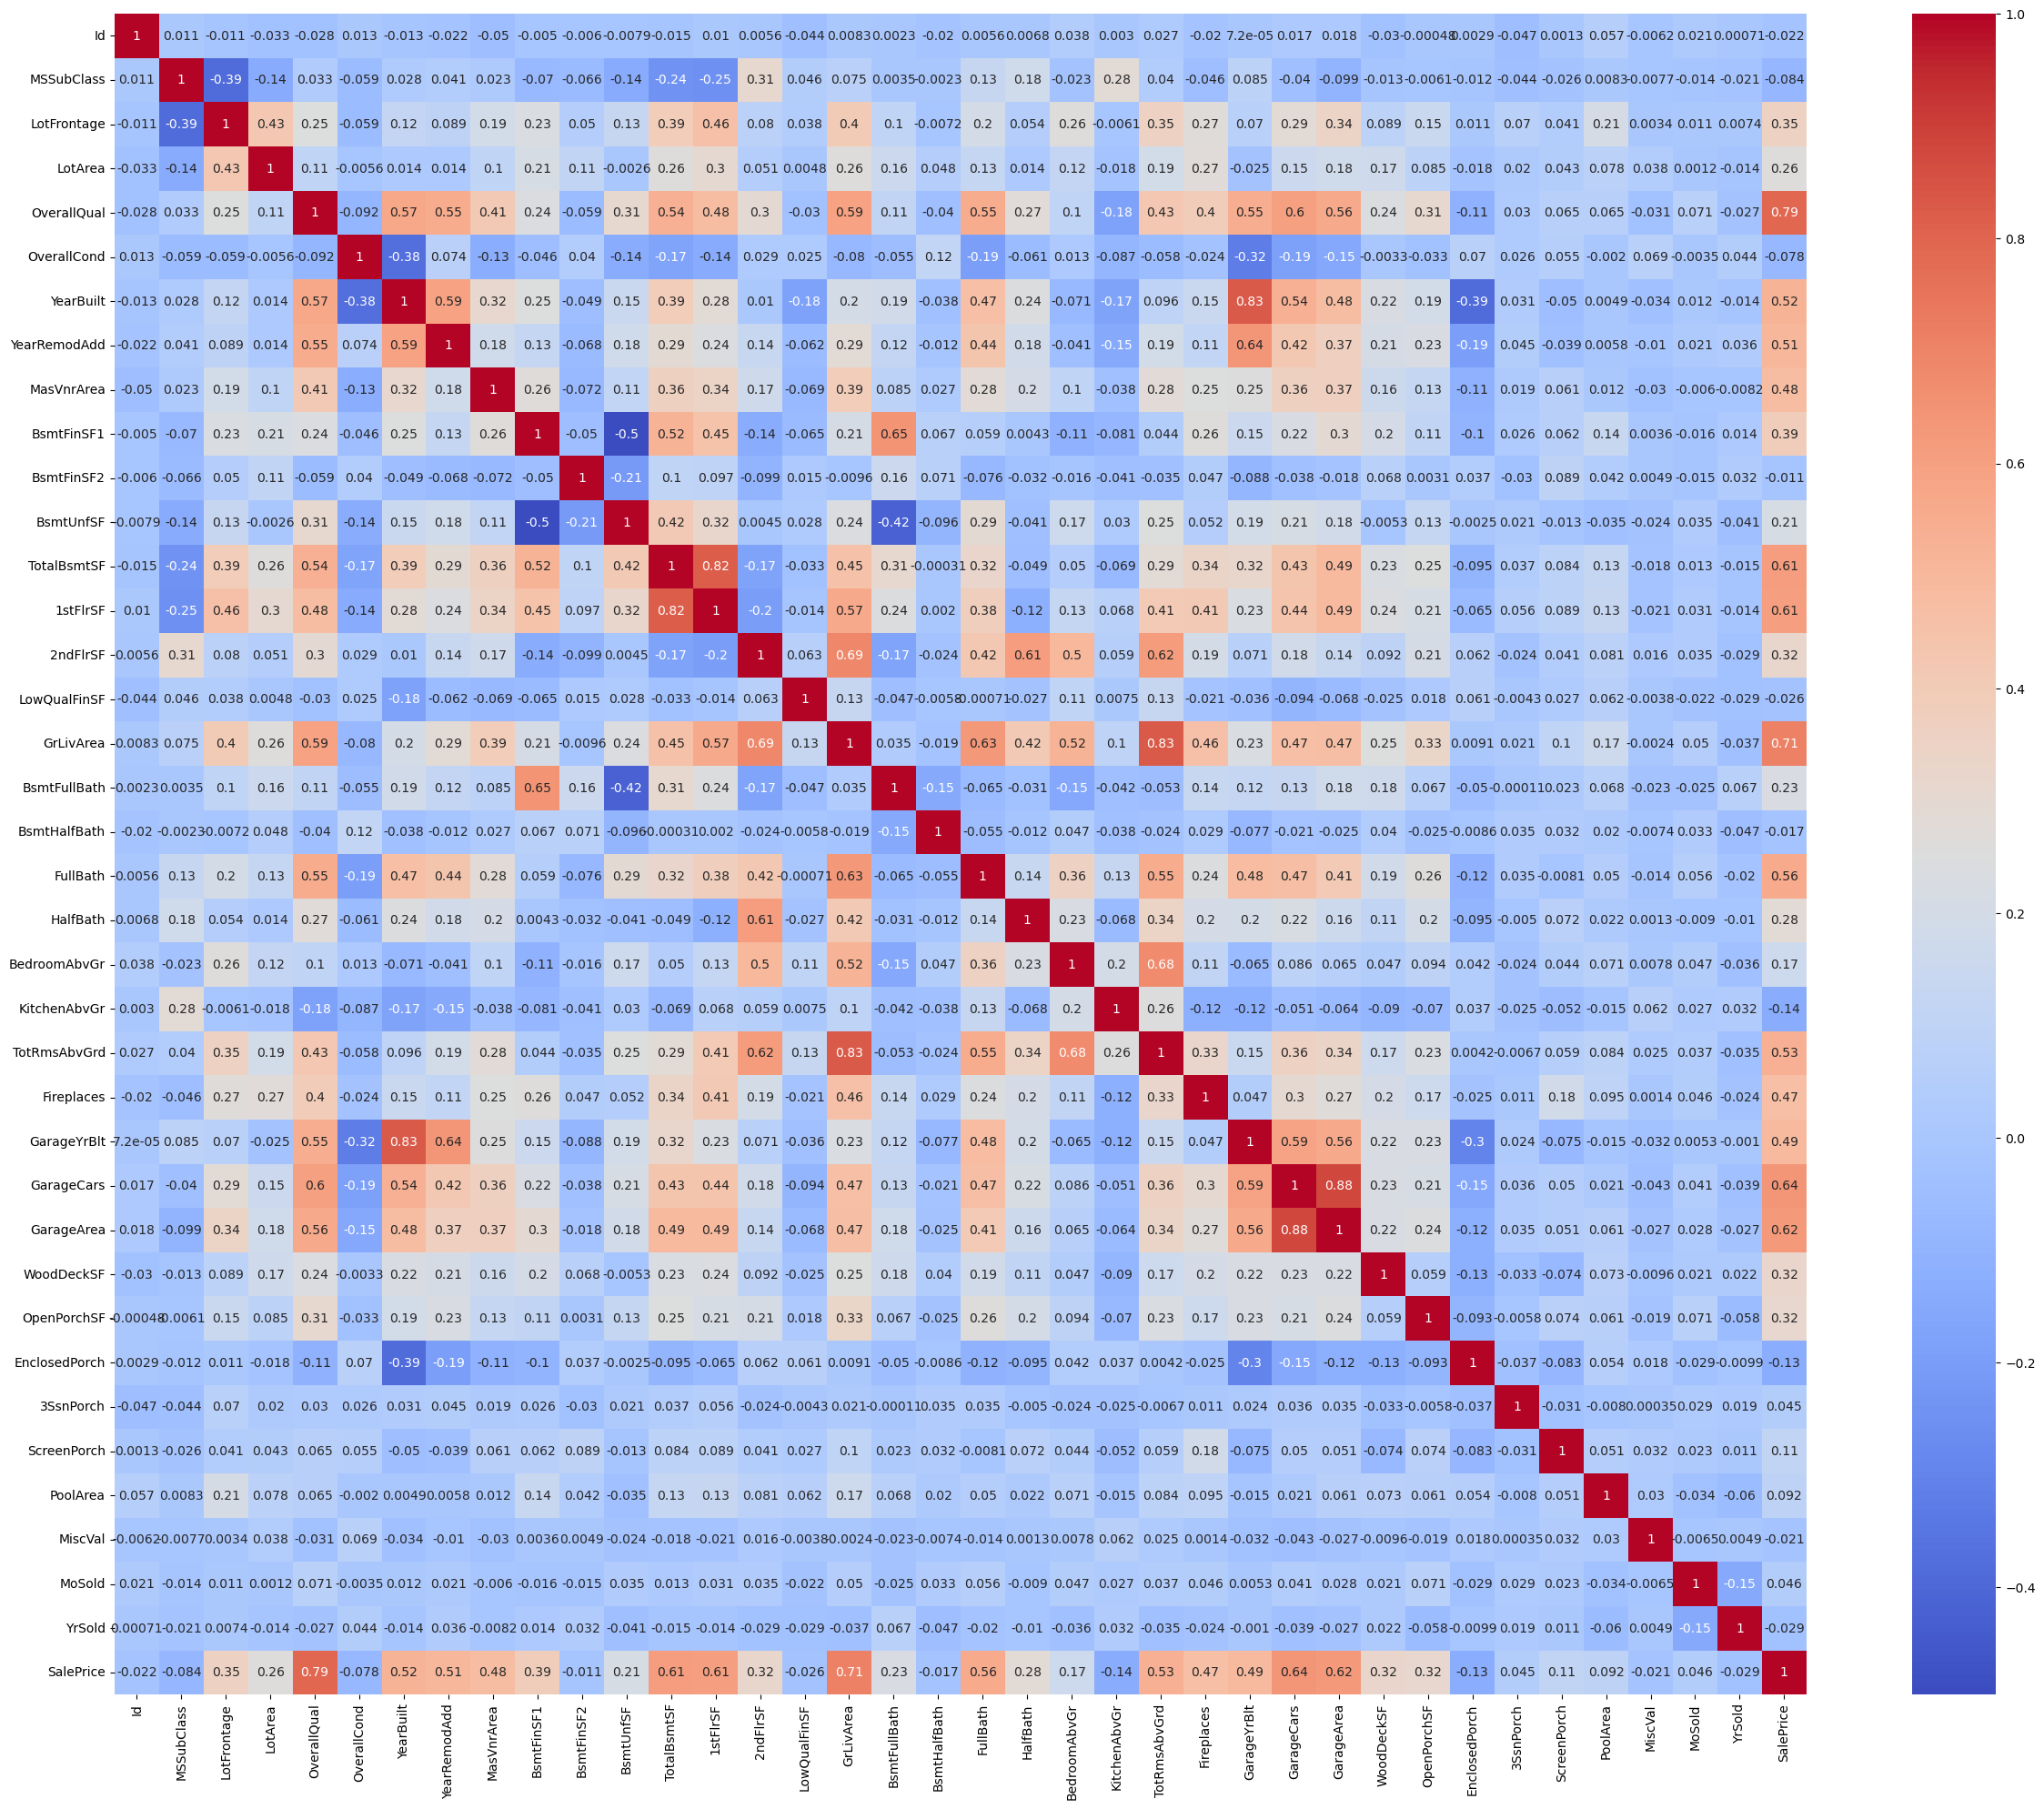

In [198]:
# correlação das variáveis numéricas
df_numericos = df_train[numericos].corr()
plt.figure(figsize=(30,24))
sns.heatmap(df_numericos, cmap='coolwarm', annot=True)

corr_df = df_numericos.corr().unstack().reset_index()
corr_df.columns = ['Atributo 1', 'Atributo 2', 'Correlação']
cut=0.9
numericos_alta_correlacao = corr_df[(corr_df['Correlação'] >= cut) & 
                                    (corr_df['Atributo 1'] != corr_df['Atributo 2']) &
                                    (corr_df['Atributo 1'] < corr_df['Atributo 2'])].sort_values(by='Correlação', ascending=False)

numericos_baixa_correlacao = corr_df[(corr_df['Correlação'] <= -cut) &
                                    (corr_df['Atributo 1'] != corr_df['Atributo 2']) &
                                    (corr_df['Atributo 1'] < corr_df['Atributo 2'])].sort_values(by='Correlação', ascending=True)

print("Numericos Alta Correlação:")
print(numericos_alta_correlacao)
print("\nNumericos Baixa Correlação:")
print(numericos_baixa_correlacao)



In [199]:
# correlação das variáveis categóricas

''' A função "get_dummies" do pandas para cria variáveis dummy para as colunas com
dados do tipo "object". Em seguida, calcula a correlação entre as variáveis
numéricas usando o método "corr" do pandas.
Basicamente substitui os valores categóricos ou números, como 0, 1, 2, 3... '''

df_categoricos = pd.get_dummies(df_train[categoricos])
#plt.figure(figsize=(30,24))
#sns.heatmap(df_categoricos, cmap='coolwarm', annot=True)

corr_df = df_categoricos.corr().unstack().reset_index()
corr_df.columns = ['Atributo 1', 'Atributo 2', 'Correlação']
#cut=0.8 setado no código acima
categoricos_alta_correlacao = corr_df[(corr_df['Correlação'] >= cut) & 
                                    (corr_df['Atributo 1'] != corr_df['Atributo 2']) &
                                    (corr_df['Atributo 1'] < corr_df['Atributo 2'])].sort_values(by='Correlação', ascending=False)

categoricos_baixa_correlacao = corr_df[(corr_df['Correlação'] <= -cut) &
                                    (corr_df['Atributo 1'] != corr_df['Atributo 2']) &
                                    (corr_df['Atributo 1'] < corr_df['Atributo 2'])].sort_values(by='Correlação', ascending=True)

print("categoricos Alta Correlação:")
print(categoricos_alta_correlacao)
print("\ncategoricos Baixa Correlação:")
print(categoricos_baixa_correlacao)


categoricos Alta Correlação:
                  Atributo 1           Atributo 2  Correlação
25315     Exterior1st_CBlock   Exterior2nd_CBlock    1.000000
63495  SaleCondition_Partial         SaleType_New    0.986819
27340    Exterior1st_VinylSd  Exterior2nd_VinylSd    0.977525
25568    Exterior1st_CemntBd  Exterior2nd_CmentBd    0.974171
26327    Exterior1st_MetalSd  Exterior2nd_MetalSd    0.973065

categoricos Baixa Correlação:
             Atributo 1        Atributo 2  Correlação
1266        Street_Grvl       Street_Pave   -1.000000
4302   Utilities_AllPub  Utilities_NoSeWa   -1.000000
45794      CentralAir_N      CentralAir_Y   -1.000000
21001   RoofStyle_Gable     RoofStyle_Hip   -0.933462
2280       LotShape_IR1      LotShape_Reg   -0.925959
6073      LandSlope_Gtl     LandSlope_Mod   -0.908607
33650      ExterQual_Gd      ExterQual_TA   -0.906121


In [201]:
from sklearn.neighbors import KNeighborsRegressor
from skrebate import ReliefF
from sklearn.preprocessing import LabelEncoder

#Separar os atributo alvo dos atributos influenciadores do alvo
X = df_train.drop("SalePrice", axis=1).drop("Id", axis=1)
y = df_train['SalePrice'].copy()

#Converter variáveis categóricas em numéricas
categorical_columns = X.select_dtypes(include=["object"]).columns
for column in categorical_columns:
    encoder = LabelEncoder()
    X[column] = encoder.fit_transform(X[column])


#ReliefF
relief = ReliefF(n_features_to_select=20, n_neighbors=100) # https://epistasislab.github.io/scikit-rebate/using/
relief.fit(X.values, y.values) # Ajustar o algoritmo ReliefF aos dados de treinamento

# Extrair os pesos calculados pelo ReliefF
feature_scores = relief.feature_importances_

# Selecionar os melhores atributos
selected_features = X.columns[relief.top_features_] #????????????? Por algum motibo ele não está filtrando as 20 melhores, conforme especificado em n_features_to_select
X_selected = X[selected_features] #????????? Alternativa feita abaixo para filtrar os 20 atributos com maior influencia na variável alvo
print("Atributos selecionados:")
print(selected_features)
print("\nOrdem de importância dos atributos:")
relief_result = sorted(zip(selected_features, feature_scores), key=lambda x: x[1], reverse=True)
print(relief_result)


c:\Users\tavar\anaconda3\lib\site-packages\skrebate\relieff.py:360: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



Atributos selecionados:
Index(['GrLivArea', 'OverallQual', 'ExterQual', 'KitchenQual', 'BsmtQual',
       'GarageCars', 'FullBath', '1stFlrSF', 'TotalBsmtSF', 'GarageArea',
       'YearBuilt', 'GarageFinish', 'TotRmsAbvGrd', 'FireplaceQu',
       'Foundation', '2ndFlrSF', 'Fireplaces', 'GarageYrBlt', 'MasVnrArea',
       'BsmtFinSF1', 'YearRemodAdd', 'MasVnrType', 'GarageType', 'HalfBath',
       'BsmtExposure', 'HouseStyle', 'LotFrontage', 'Neighborhood',
       'BedroomAbvGr', 'OpenPorchSF', 'WoodDeckSF', 'BsmtUnfSF', 'HeatingQC',
       'BsmtFinType1', 'MSSubClass', 'MSZoning', 'LotShape', 'BsmtFullBath',
       'RoofStyle', 'Exterior1st', 'BldgType', 'LotArea', 'Exterior2nd',
       'SaleType', 'OverallCond', 'GarageQual', 'SaleCondition', 'LotConfig',
       'GarageCond', 'LandContour', 'LandSlope', 'BsmtCond', 'ScreenPorch',
       'YrSold', 'MoSold', 'CentralAir', 'KitchenAbvGr', '3SsnPorch',
       'RoofMatl', 'Heating', 'ExterCond', 'BsmtFinType2', 'EnclosedPorch',
       'All

In [203]:
#Alternativa para criar um novo dataframe com os primeiros 20% de atributos que mais influenciam a variável alvo

top_relief_result = [item[0] for item in relief_result[:int(len(relief_result) * 0.2)]] #Os primeiros 20% (0.2) do reliefF
df_train_relief = df_train[top_relief_result].copy()
df_train_relief = df_train_relief.join(df_train["SalePrice"])
df_train_relief

,GarageQual,Fireplaces,LotFrontage,ScreenPorch,OpenPorchSF,ExterCond,GarageCond,Exterior2nd,BsmtFullBath,BsmtFinType2,MasVnrArea,Heating,YrSold,KitchenAbvGr,BedroomAbvGr,SalePrice
0,TA,0,65.0,0,61,TA,TA,VinylSd,1,Unf,196.0,GasA,2008,1,3,208500
1,TA,1,80.0,0,0,TA,TA,MetalSd,0,Unf,0.0,GasA,2007,1,3,181500
2,TA,1,68.0,0,42,TA,TA,VinylSd,1,Unf,162.0,GasA,2008,1,3,223500
3,TA,1,60.0,0,35,TA,TA,Wd Shng,1,Unf,0.0,GasA,2006,1,3,140000
4,TA,1,84.0,0,84,TA,TA,VinylSd,1,Unf,350.0,GasA,2008,1,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,TA,1,62.0,0,40,TA,TA,VinylSd,0,Unf,0.0,GasA,2007,1,3,175000
1456,TA,2,85.0,0,0,TA,TA,Plywood,1,Rec,119.0,GasA,2010,1,3,210000
1457,TA,2,66.0,0,60,Gd,TA,CmentBd,0,Unf,0.0,GasA,2010,1,4,266500
1458,TA,0,68.0,0,0,TA,TA,MetalSd,1,Rec,0.0,GasA,2010,1,2,142125


In [249]:
### QUESTÃO 12 BLOCO 2 EM DF_TRAIN

### Aplicando Binning (discretização por intervalos)
from sklearn.preprocessing import KBinsDiscretizer

# 1) Separar as variáveis numéricas e categóricas (já feito anteriormente)


# Copiar apenas as colunas numéricas do dataframe df_train
df_train_numericos = df_train[numericos].copy()
df_train_numericos.drop('SalePrice', axis=1)

# Tratar valores ausentes substituindo-os pela mediana
df_train_numericos.fillna(df_train_numericos.median(), inplace=True)
df_train_numericos = df_train_numericos.join(df_train["SalePrice"], rsuffix='_df_train')

# Inicializar o objeto KBinsDiscretizer
n_bins = 10  # Número de bins desejado
est = KBinsDiscretizer(n_bins=n_bins, strategy="uniform", encode="ordinal")

# Aplicar a discretização às variáveis numéricas
df_train_numericos[numericos] = est.fit_transform(df_train_numericos[numericos])

# Juntar as variáveis numéricas discretizadas com as variáveis categóricas
df_train_binning = pd.concat([df_train_numericos, df_train[categoricos]], axis=1)

# Exibir o dataframe com as variáveis discretizadas
df_train_binning


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,0.0,2.0,1.0,0.0,6.0,5.0,9.0,8.0,1.0,1.0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,0.0,0.0,2.0,0.0,5.0,8.0,7.0,4.0,0.0,1.0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,0.0,2.0,1.0,0.0,6.0,5.0,9.0,8.0,1.0,0.0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,0.0,2.0,1.0,0.0,6.0,5.0,3.0,3.0,0.0,0.0,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,0.0,2.0,2.0,0.0,7.0,5.0,9.0,8.0,2.0,1.0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,9.0,2.0,1.0,0.0,5.0,5.0,9.0,8.0,0.0,0.0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,9.0,0.0,2.0,0.0,5.0,6.0,7.0,6.0,0.0,1.0,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,9.0,2.0,1.0,0.0,6.0,9.0,5.0,9.0,0.0,0.0,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,9.0,0.0,1.0,0.0,4.0,6.0,5.0,7.0,0.0,0.0,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [232]:
### QUESTÃO 12 BLOCO 2

### Aplicando Discretização por árvore de decisão

from sklearn.tree import DecisionTreeRegressor

# Copiar o dataframe "df_train_label_encoded"
df_train_decision_tree = df_train_label_encoded.copy()

# Iterar sobre as colunas numéricas
for col in df_train_decision_tree:
    # Criar um estimador de árvore de decisão
    tree = DecisionTreeRegressor(max_depth=4)
    
    # Ajustar o estimador aos dados originais
    tree.fit(df_train_decision_tree[[col]], df_train_decision_tree['SalePrice'])
    
    # Obter as previsões do modelo
    discretized_values = tree.predict(df_train_decision_tree[[col]])
    
    # Inserir os valores discretizados no novo dataframe
    df_train_decision_tree[col] = discretized_values

# Exibir o novo dataframe com os valores discretizados
print(df_train_decision_tree)


      MSZoning    Street     Alley  LotShape  LandContour  Utilities  \
0     0.538662  0.469739  0.488678  0.336216     0.462243     0.4695   
1     0.538662  0.469739  0.488678  0.336216     0.462243     0.4695   
2     0.538662  0.469739  0.488678  0.681818     0.462243     0.4695   
3     0.538662  0.469739  0.488678  0.681818     0.462243     0.4695   
4     0.538662  0.469739  0.488678  0.681818     0.462243     0.4695   
...        ...       ...       ...       ...          ...        ...   
1455  0.538662  0.469739  0.488678  0.336216     0.462243     0.4695   
1456  0.538662  0.469739  0.488678  0.336216     0.462243     0.4695   
1457  0.538662  0.469739  0.488678  0.336216     0.462243     0.4695   
1458  0.538662  0.469739  0.488678  0.336216     0.462243     0.4695   
1459  0.538662  0.469739  0.488678  0.336216     0.462243     0.4695   

      LotConfig  LandSlope  Neighborhood  Condition1  ...  WoodDeckSF  \
0      0.435361   0.459479      0.467626    0.499211  ...    0

In [236]:
from sklearn.preprocessing import KBinsDiscretizer

df_train_relief.fillna(df_train_numericos.median(), inplace=True)

# Separar as variáveis numéricas e categóricas
relief_numericos = df_train_relief.select_dtypes(include=np.number).columns
relief_categoricos = df_train_relief.select_dtypes(include="object").columns

# Criar uma cópia do dataframe com as colunas numéricas e a variável alvo
df_numeric = df_train_relief[relief_numericos].copy()

# Definir o número desejado de intervalos
n_bins = 5

# Inicializar o objeto KBinsDiscretizer
est = KBinsDiscretizer(n_bins=n_bins, strategy="uniform", encode="ordinal")

# Aplicar a discretização às variáveis numéricas
df_numeric[relief_numericos] = est.fit_transform(df_numeric[relief_numericos])

# Juntar as variáveis numéricas discretizadas com as variáveis categóricas
df_discretized = pd.concat([df_numeric, df_train_relief[relief_categoricos]], axis=1)

# Exibir o dataframe com as variáveis discretizada
df_discretized

,Fireplaces,LotFrontage,ScreenPorch,OpenPorchSF,BsmtFullBath,MasVnrArea,YrSold,KitchenAbvGr,BedroomAbvGr,SalePrice,GarageQual,ExterCond,GarageCond,Exterior2nd,BsmtFinType2,Heating
0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,TA,TA,TA,VinylSd,Unf,GasA
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,TA,TA,TA,MetalSd,Unf,GasA
2,1.0,1.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,TA,TA,TA,VinylSd,Unf,GasA
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,TA,TA,TA,Wd Shng,Unf,GasA
4,1.0,1.0,0.0,0.0,1.0,1.0,2.0,1.0,2.0,1.0,TA,TA,TA,VinylSd,Unf,GasA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,TA,TA,TA,VinylSd,Unf,GasA
1456,3.0,1.0,0.0,0.0,1.0,0.0,4.0,1.0,1.0,1.0,TA,TA,TA,Plywood,Rec,GasA
1457,3.0,1.0,0.0,0.0,0.0,0.0,4.0,1.0,2.0,1.0,TA,Gd,TA,CmentBd,Unf,GasA
1458,0.0,1.0,0.0,0.0,1.0,0.0,4.0,1.0,1.0,0.0,TA,TA,TA,MetalSd,Rec,GasA


In [239]:
from sklearn.tree import DecisionTreeRegressor



# Create a new dataframe to store the label encoded data
df_train_relief_label_encoded = pd.DataFrame()

# Create a dictionary to store the mapping of categorical values to numerical values
mapa_de_legendas_relief = {}

# Encode the categorical variables using LabelEncoder and store the mapping
label_encoder_relief = LabelEncoder()
for col in relief_categoricos:
    encoded_values = label_encoder_relief.fit_transform(df_train_relief[col])
    df_train_relief_label_encoded[col] = encoded_values
    mapa_de_legendas_relief[col] = dict(zip(label_encoder_relief.classes_, label_encoder_relief.transform(label_encoder_relief.classes_)))

# Add the numeric columns to the label encoded dataframe
df_train_relief_label_encoded[relief_numericos] = df_train_relief[relief_numericos]

# Print the resulting dataframe
print(df_train_relief_label_encoded)

# Print the label mapping dictionary
for col, mapping in mapa_de_legendas_relief.items():
    print(f"\nLabel Mapping for column '{col}':")
    for category, encoded_value in mapping.items():
        print(f"{category}: {encoded_value}")





# Copiar o dataframe "df_train_relief_label_encoded"
df_train_decision_tree = df_train_relief_label_encoded.copy()

# Iterar sobre as colunas numéricas
for col in df_train_decision_tree:
    # Criar um estimador de árvore de decisão
    tree = DecisionTreeRegressor(max_depth=4)
    
    # Ajustar o estimador aos dados originais
    tree.fit(df_train_decision_tree[[col]], df_train_decision_tree['SalePrice'])
    
    # Obter as previsões do modelo
    discretized_values = tree.predict(df_train_decision_tree[[col]])
    
    # Inserir os valores discretizados no novo dataframe
    df_train_decision_tree[col] = discretized_values

# Exibir o novo dataframe com os valores discretizados
df_train_decision_tree


      GarageQual  ExterCond  GarageCond  Exterior2nd  BsmtFinType2  Heating  \
0              4          4           4           13             5        1   
1              4          4           4            8             5        1   
2              4          4           4           13             5        1   
3              4          4           4           15             5        1   
4              4          4           4           13             5        1   
...          ...        ...         ...          ...           ...      ...   
1455           4          4           4           13             5        1   
1456           4          4           4           10             4        1   
1457           4          2           4            5             5        1   
1458           4          4           4            8             4        1   
1459           4          4           4            6             3        1   

      Fireplaces  LotFrontage  ScreenPorch  OpenPor

,GarageQual,ExterCond,GarageCond,Exterior2nd,BsmtFinType2,Heating,Fireplaces,LotFrontage,ScreenPorch,OpenPorchSF,BsmtFullBath,MasVnrArea,YrSold,KitchenAbvGr,BedroomAbvGr,SalePrice
0,187489.836003,184034.896256,187885.735294,214432.460317,184694.690287,182021.195378,141331.482609,182350.324675,178888.061756,222453.379630,202522.918367,217621.971098,177360.838816,183388.79023,181056.870647,211119.666667
1,187489.836003,184034.896256,187885.735294,149803.172897,184694.690287,182021.195378,211843.909231,181105.760000,178888.061756,144614.487805,165521.640187,157293.746835,186063.151976,183388.79023,181056.870647,175131.779221
2,187489.836003,184034.896256,187885.735294,214432.460317,184694.690287,182021.195378,211843.909231,182350.324675,178888.061756,192089.916667,202522.918367,184407.287671,177360.838816,183388.79023,181056.870647,232856.209524
3,187489.836003,184034.896256,187885.735294,161328.947368,184694.690287,182021.195378,211843.909231,138682.131455,178888.061756,196787.098901,202522.918367,157293.746835,182549.458599,183388.79023,181056.870647,140973.840000
4,187489.836003,184034.896256,187885.735294,214432.460317,184694.690287,182021.195378,211843.909231,230415.610000,178888.061756,222453.379630,202522.918367,246292.653061,177360.838816,183388.79023,220421.253521,262633.541176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,187489.836003,184034.896256,187885.735294,214432.460317,184694.690287,182021.195378,211843.909231,182350.324675,178888.061756,177515.571429,165521.640187,157293.746835,186063.151976,183388.79023,181056.870647,175131.779221
1456,187489.836003,184034.896256,187885.735294,166871.362069,166666.885965,182021.195378,240588.539130,230415.610000,178888.061756,144614.487805,202522.918367,184407.287671,177393.674286,183388.79023,181056.870647,211119.666667
1457,187489.836003,168897.568493,187885.735294,230093.833333,184694.690287,182021.195378,240588.539130,182350.324675,178888.061756,222453.379630,165521.640187,157293.746835,177393.674286,183388.79023,220421.253521,262633.541176
1458,187489.836003,184034.896256,187885.735294,149803.172897,166666.885965,182021.195378,141331.482609,182350.324675,178888.061756,144614.487805,202522.918367,157293.746835,177393.674286,183388.79023,158197.659218,140973.840000


        Fireplaces  LotFrontage  ScreenPorch  OpenPorchSF  BsmtFullBath  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean      0.613014    57.800685    15.060959    46.660274      0.425342   
std       0.644666    34.370068    55.757415    66.256028      0.518911   
min       0.000000     1.000000     0.000000     0.000000      0.000000   
25%       0.000000    42.000000     0.000000     0.000000      0.000000   
50%       1.000000    63.000000     0.000000    25.000000      0.000000   
75%       1.000000    79.000000     0.000000    68.000000      1.000000   
max       3.000000   313.000000   480.000000   547.000000      3.000000   

        MasVnrArea       YrSold  KitchenAbvGr  BedroomAbvGr      SalePrice  
count  1460.000000  1460.000000   1460.000000   1460.000000    1460.000000  
mean    103.117123  2007.815753      1.046575      2.866438  180921.195890  
std     180.731373     1.328095      0.220338      0.815778   79442.502883  
min       0.0000

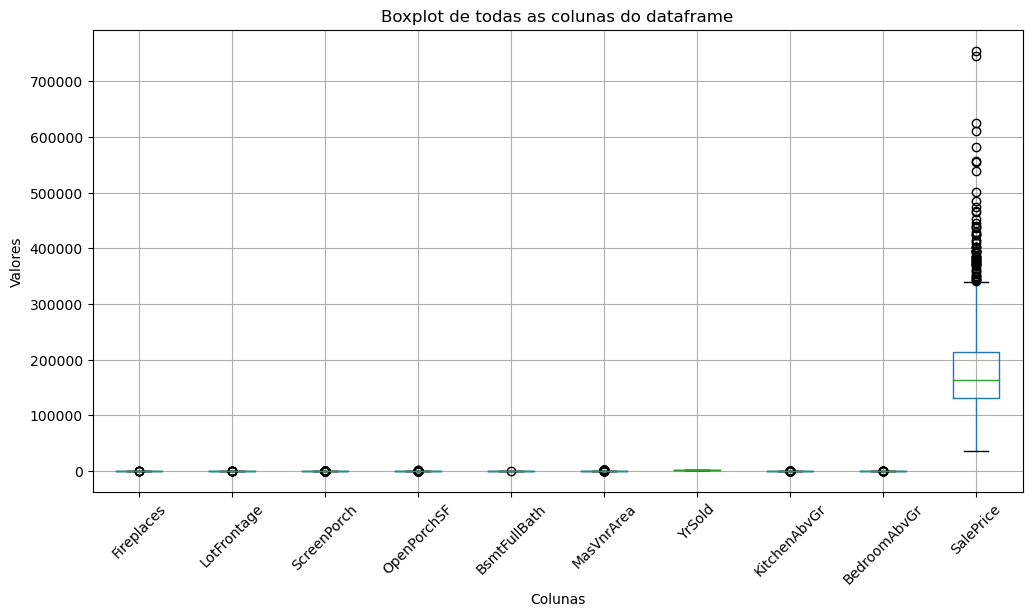

In [251]:
# Calcular a estatística descritiva do dataframe
df_stats = df_train_relief.describe()
print(df_stats)
# Selecionar todas as colunas do dataframe
columns = df_train_relief.columns

# Criar o gráfico boxplot das colunas selecionadas
plt.figure(figsize=(12, 6))  # Definir o tamanho da figura
df_train_relief[columns].boxplot()  # Gerar o boxplot
plt.title('Boxplot de todas as colunas do dataframe')
plt.xlabel('Colunas')
plt.ylabel('Valores')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x
plt.show()
